---
title: Correlation between Enformer CAGE:Brain predictions and mean TPM in various GTEx brain tissues
author: Sabrina Mi 
date: 8/30/2023
---

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

brain_tissues = ["amygdala", "anterior_cingulate_cortex_ba24", "caudate_basal_ganglia", "cerebellar_hemisphere", "cerebellum", "cortex", "frontal_cortex_ba9", "hippocampus", "hypothalamus", "nucleus_accumbens_basal_ganglia", "putamen_basal_ganglia", "spinal_cord_cervical_c-1", "substantia_nigra"]
df = pd.read_csv("/home/s1mi/enformer_rat_data/output/hg38_predicted_expression.csv", index_col=0)
for tissue in brain_tissues:
    tpm = pd.read_csv(f"https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/gene_tpm/gene_tpm_2017-06-05_v8_brain_{tissue}.gct.gz", header=2, sep="\t")
    tpm['Name'] = tpm['Name'].apply(lambda gene: gene.split('.')[0])
    # some genes are repeated (different ensembl version), remove second occurrence
    tpm = tpm[~tpm.duplicated(subset=['Name'], keep='first')]
    tpm.set_index('Name', inplace=True)
    # Calculate average gene expression
    mean_tpm = tpm.drop(columns=['id', 'Description']).mean(axis=1)
    mean_tpm.name = tissue.replace("_", " ")
    df = df.merge(mean_tpm, left_index = True, right_index = True, how = "inner")

In [64]:
df.to_csv("/home/s1mi/enformer_rat_data/output/hg38_predicted_vs_observed_expression_all_GTEx_brain_tissues.csv")

In [65]:
corr_df = df.corr()
corr_df

,enformer,amygdala,anterior cingulate cortex ba24,caudate basal ganglia,cerebellar hemisphere,cerebellum,cortex,frontal cortex ba9,hippocampus,hypothalamus,nucleus accumbens basal ganglia,putamen basal ganglia,spinal cord cervical c-1,substantia nigra
enformer,1.000000,0.467619,0.537760,0.475759,0.525852,0.523848,0.539825,0.557909,0.472233,0.410200,0.487022,0.463762,0.246135,0.380836
amygdala,0.467619,1.000000,0.954906,0.932110,0.699623,0.720513,0.908948,0.896015,0.967708,0.802080,0.935692,0.934127,0.713773,0.896603
anterior cingulate cortex ba24,0.537760,0.954906,1.000000,0.918404,0.766384,0.779114,0.975494,0.978834,0.919471,0.763097,0.929791,0.905958,0.570054,0.783233
caudate basal ganglia,0.475759,0.932110,0.918404,1.000000,0.683751,0.714650,0.900610,0.880568,0.900796,0.752087,0.977106,0.989579,0.616714,0.820553
cerebellar hemisphere,0.525852,0.699623,0.766384,0.683751,1.000000,0.977913,0.759456,0.783059,0.698800,0.609139,0.725290,0.664395,0.386328,0.581458
cerebellum,0.523848,0.720513,0.779114,0.714650,0.977913,1.000000,0.789908,0.782710,0.717366,0.626874,0.749312,0.697112,0.410336,0.611442
cortex,0.539825,0.908948,0.975494,0.900610,0.759456,0.789908,1.000000,0.981027,0.887993,0.730072,0.895736,0.893500,0.538779,0.742445
frontal cortex ba9,0.557909,0.896015,0.978834,0.880568,0.783059,0.782710,0.981027,1.000000,0.877334,0.722115,0.884639,0.870592,0.514861,0.719960
hippocampus,0.472233,0.967708,0.919471,0.900796,0.698800,0.717366,0.887993,0.877334,1.000000,0.814058,0.899047,0.915272,0.812031,0.934632
hypothalamus,0.410200,0.802080,0.763097,0.752087,0.609139,0.626874,0.730072,0.722115,0.814058,1.000000,0.763480,0.745192,0.681446,0.806814


In [71]:
def plot_predicted_vs_observed(tissue):
    corr = corr_df.loc[tissue, "enformer"]
    plt.scatter(df['enformer'], df[tissue], label=f'Correlation: {corr:.2f}')
    plt.xlabel('enformer')
    plt.ylabel('gtex')
    plt.title(tissue.replace("_", " "))
    plt.legend()
    plt.grid(True)
    plt.show()

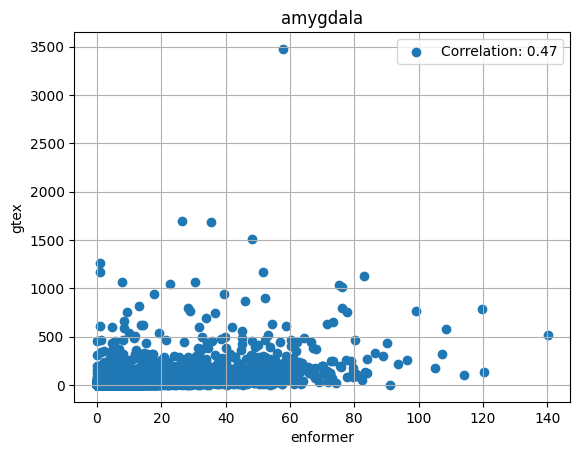

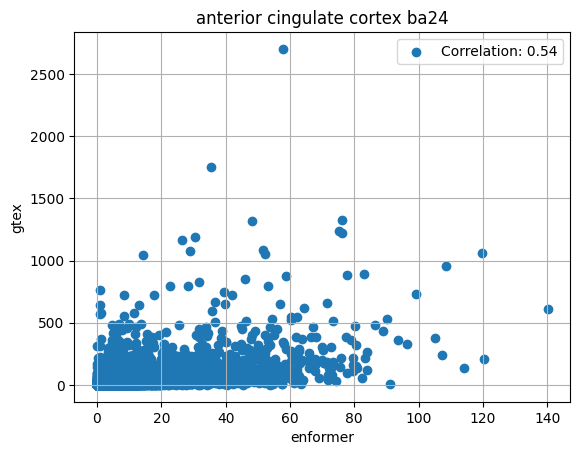

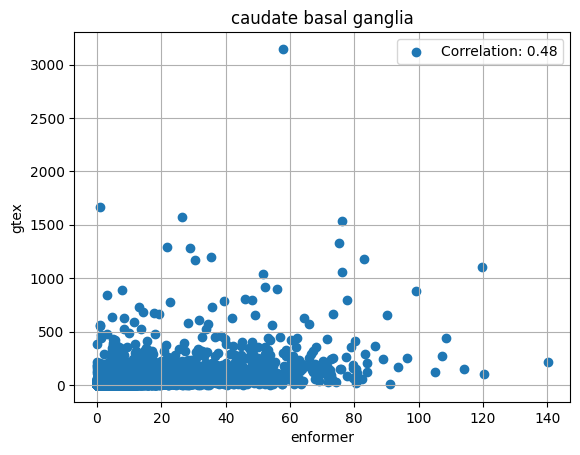

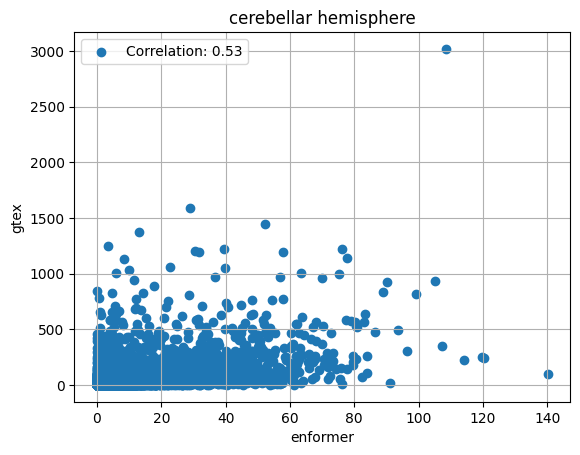

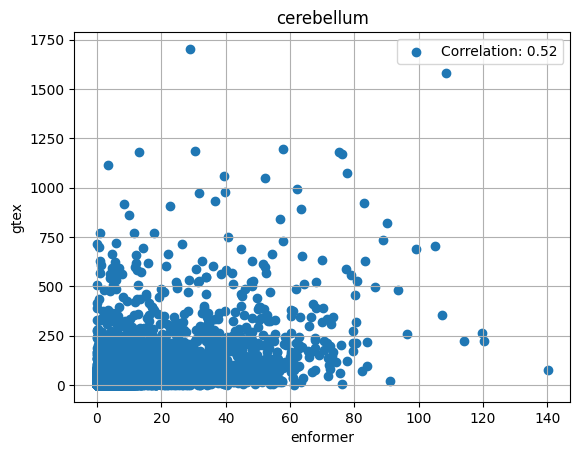

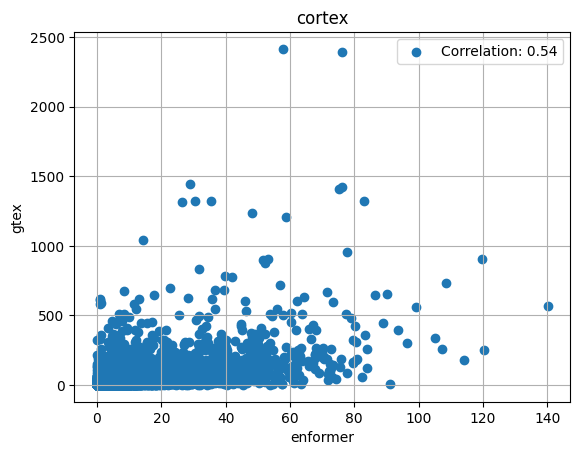

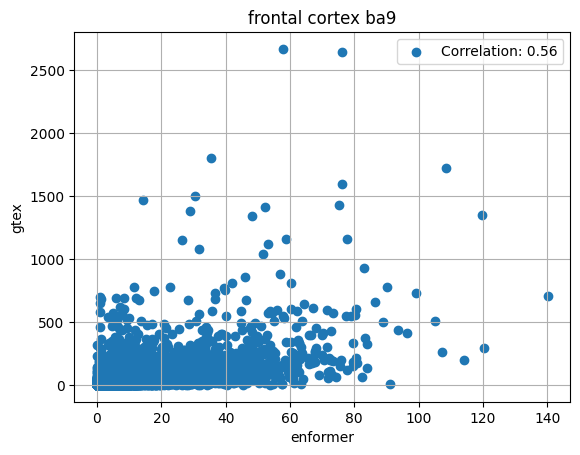

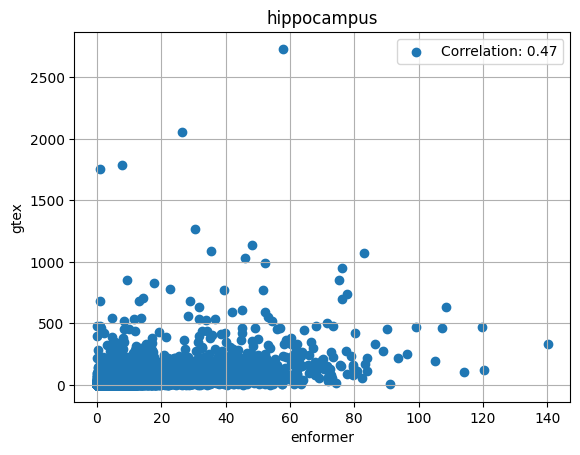

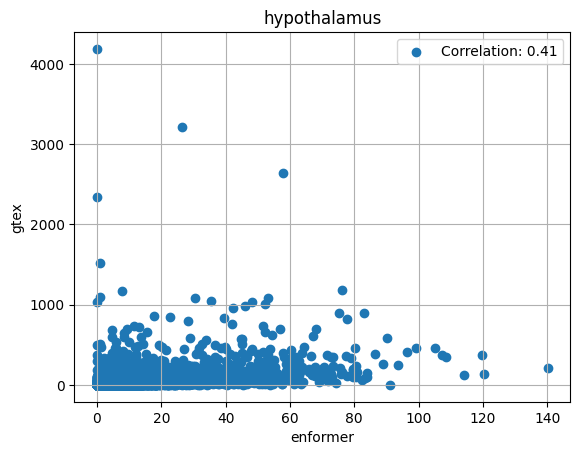

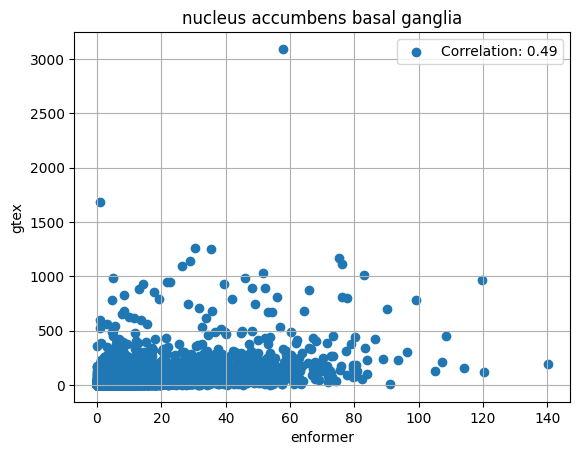

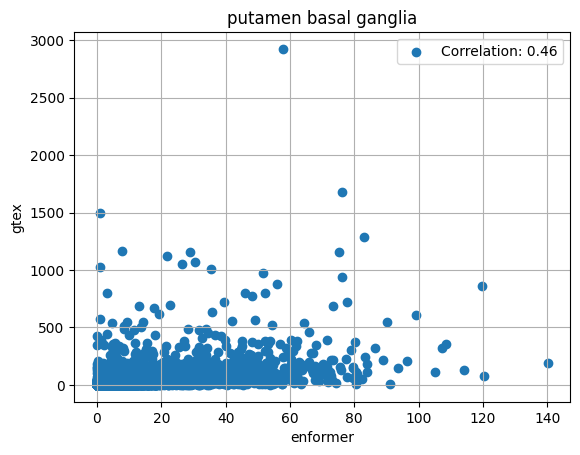

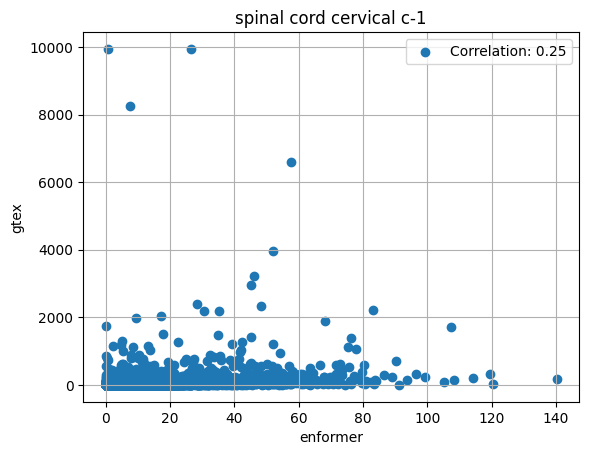

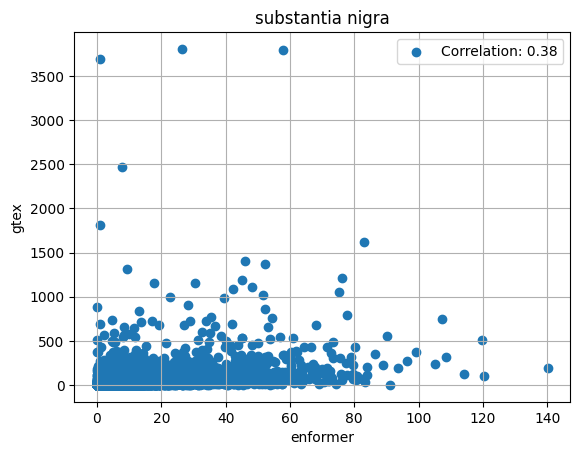

In [72]:
for tissue in brain_tissues:
    plot_predicted_vs_observed(tissue.replace("_", " "))